<a id="3"></a>
# <p style="padding:10px;background-color:red;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Stock price prediction using time series data</p>
<br>

## Working on Tesla Dataset

## Step 1: Data Collection

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# Download historical Tesla stock price data
ticker = 'TSLA'
stock_data = yf.download(ticker, start="2020-01-01", end="2024-01-01")

# Display the first few rows of the data
stock_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2020-01-02 00:00:00+00:00,28.684000,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03 00:00:00+00:00,29.534000,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06 00:00:00+00:00,30.102667,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07 00:00:00+00:00,31.270666,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08 00:00:00+00:00,32.809334,32.809334,33.232666,31.215334,31.580000,467164500


## Step 2: Exploratory Data Analysis (EDA)

In [3]:
# Check for missing values
print(stock_data.isnull().sum())


Price      Ticker
Adj Close  TSLA      0
Close      TSLA      0
High       TSLA      0
Low        TSLA      0
Open       TSLA      0
Volume     TSLA      0
dtype: int64


In [4]:
# Check the DataFrame structure
print(stock_data.columns)  # Print the column names


MultiIndex([('Adj Close', 'TSLA'),
            (    'Close', 'TSLA'),
            (     'High', 'TSLA'),
            (      'Low', 'TSLA'),
            (     'Open', 'TSLA'),
            (   'Volume', 'TSLA')],
           names=['Price', 'Ticker'])


In [5]:
print(stock_data.head())    # Print the first few rows of the DataFrame

Price                      Adj Close      Close       High        Low  \
Ticker                          TSLA       TSLA       TSLA       TSLA   
Date                                                                    
2020-01-02 00:00:00+00:00  28.684000  28.684000  28.713333  28.114000   
2020-01-03 00:00:00+00:00  29.534000  29.534000  30.266666  29.128000   
2020-01-06 00:00:00+00:00  30.102667  30.102667  30.104000  29.333332   
2020-01-07 00:00:00+00:00  31.270666  31.270666  31.441999  30.224001   
2020-01-08 00:00:00+00:00  32.809334  32.809334  33.232666  31.215334   

Price                           Open     Volume  
Ticker                          TSLA       TSLA  
Date                                             
2020-01-02 00:00:00+00:00  28.299999  142981500  
2020-01-03 00:00:00+00:00  29.366667  266677500  
2020-01-06 00:00:00+00:00  29.364668  151995000  
2020-01-07 00:00:00+00:00  30.760000  268231500  
2020-01-08 00:00:00+00:00  31.580000  467164500  


In [6]:
print(stock_data.columns)

MultiIndex([('Adj Close', 'TSLA'),
            (    'Close', 'TSLA'),
            (     'High', 'TSLA'),
            (      'Low', 'TSLA'),
            (     'Open', 'TSLA'),
            (   'Volume', 'TSLA')],
           names=['Price', 'Ticker'])


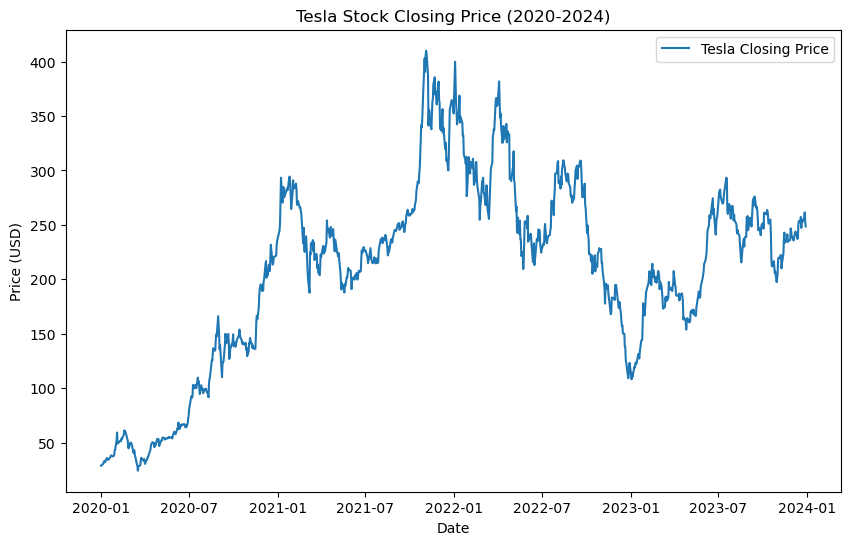

In [7]:
# Visualize the closing price over time
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Tesla Closing Price')
plt.title('Tesla Stock Closing Price (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [8]:
# Train-test split (80% train, 20% test)
train_size = int(len(stock_data) * 0.8)
train = stock_data['Close'][:train_size]
test = stock_data['Close'][train_size:]


In [9]:
# Display split information
print(f"Training data size: {len(train)}")
print(f"Testing data size: {len(test)}")


Training data size: 804
Testing data size: 202


## Step 3: Time Series Forecasting using ARIMA

In [10]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model (order needs to be tuned)
model = ARIMA(train, order=(5, 1, 0))  # (p, d, q)
model_fit = model.fit()

# Forecast future values based on the test set size
forecast = model_fit.forecast(steps=len(test))

# Evaluate model performance using Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')


C:\Users\raush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\raush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\raush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\raush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

Mean Squared Error: 4243.964867079839


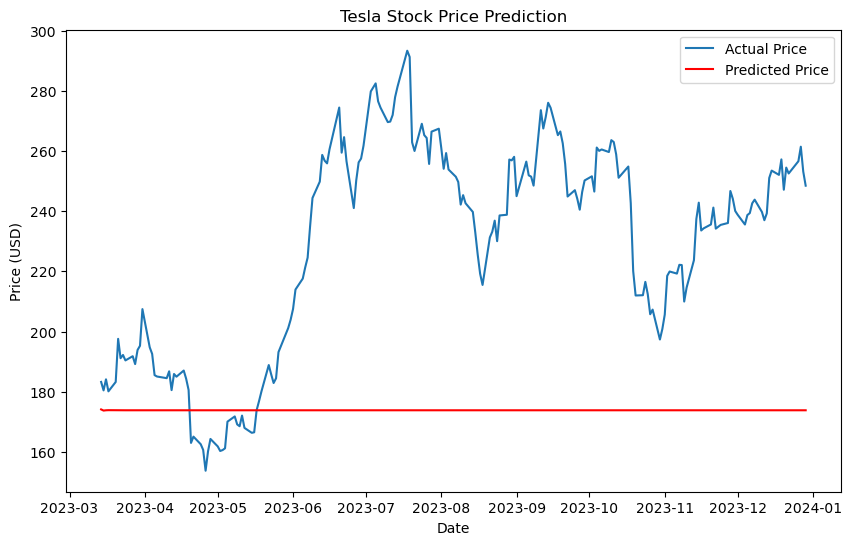

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual Price')
plt.plot(test.index, forecast, label='Predicted Price', color='red')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


## Step 4:  (DSA) Integration
**Efficient Searching (Binary Search)**

 **Using Heaps for Maximum and Minimum Stock Prices**


 **Dynamic Programming for Maximum Profit**

In [15]:
# Binary search to find stock price on a specific date
def binary_search(dates, target_date):
    low, high = 0, len(dates) - 1
    while low <= high:
        mid = (low + high) // 2
        # Remove timezone information to avoid tz-aware vs tz-naive errors
        if dates[mid].tz_localize(None) == target_date.tz_localize(None):
            return mid
        elif dates[mid].tz_localize(None) < target_date.tz_localize(None):
            low = mid + 1
        else:
            high = mid - 1
    return -1

# Convert index (dates) to list for binary search and make them timezone-naive
dates = stock_data.index.tz_localize(None).to_list()

# Example: Find stock price on '2022-05-01' and make it timezone-naive
target_date = pd.Timestamp('2022-05-01').tz_localize(None)
index = binary_search(dates, target_date)

if index != -1:
    print(f'Stock price on {target_date.date()}: {stock_data["Close"][index]}')
else:
    print('Date not found.')


Date not found.


### Using a Heap to Find Maximum and Minimum Stock Prices

In [16]:
import heapq

# Extract closing prices using MultiIndex
stock_prices = stock_data[('Close', 'TSLA')].tolist()  # Use .tolist() for conversion

# Find the 5 highest stock prices using max-heap
top_5_prices = heapq.nlargest(5, stock_prices)
print(f'Top 5 Highest Stock Prices: {top_5_prices}')

# Find the 5 lowest stock prices using min-heap
lowest_5_prices = heapq.nsmallest(5, stock_prices)
print(f'Top 5 Lowest Stock Prices: {lowest_5_prices}')


Top 5 Highest Stock Prices: [409.9700012207031, 407.36334228515625, 404.6199951171875, 402.86334228515625, 399.9266662597656]
Top 5 Lowest Stock Prices: [24.08133316040039, 28.50200080871582, 28.50933265686035, 28.68000030517578, 28.68400001525879]


### Dynamic Programming for Maximum Profit

In [17]:
# Dynamic programming approach to find maximum profit
def max_profit(prices):
    if not prices:
        return 0
    min_price = float('inf')
    max_profit = 0

    for price in prices:
        min_price = min(min_price, price)
        max_profit = max(max_profit, price - min_price)

    return max_profit

# Calculate the maximum profit
profit = max_profit(stock_prices)
print(f'Maximum Profit: {profit}')


Maximum Profit: 385.88866806030273


### Model Evaluation and Visualization

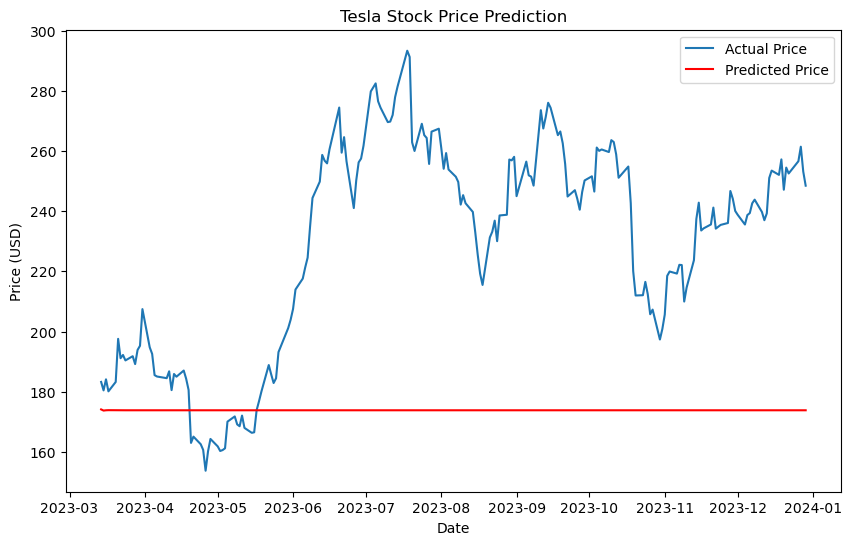

Forecasted Prices:  804     174.125624
805     173.740658
806     173.837132
807     173.874203
808     173.847403
           ...    
1001    173.839098
1002    173.839098
1003    173.839098
1004    173.839098
1005    173.839098
Name: predicted_mean, Length: 202, dtype: float64


In [18]:
# Visualize actual vs forecasted stock prices
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual Price')
plt.plot(test.index, forecast, label='Predicted Price', color='red')
plt.title(f'Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Display forecasted prices
print("Forecasted Prices: ", forecast)


In [19]:
print(stock_data.columns)

MultiIndex([('Adj Close', 'TSLA'),
            (    'Close', 'TSLA'),
            (     'High', 'TSLA'),
            (      'Low', 'TSLA'),
            (     'Open', 'TSLA'),
            (   'Volume', 'TSLA')],
           names=['Price', 'Ticker'])


In [20]:
# Accessing 'Close' for TSLA
y = stock_data[('Close', 'TSLA')]


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare the data
# Select features (you can include other features as needed)
X = stock_data.drop(columns=[('Close', 'TSLA')])  # All features except 'Close'
y = stock_data[('Low', 'TSLA')]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
# Make predictions
predictions = model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 0.5455777283639438


In [23]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate R² score (Accuracy for regression models)
r2 = r2_score(y_test, y_pred)
print(f"R² score (Accuracy): {r2}")

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


R² score (Accuracy): 0.9997510265528173
Mean Squared Error (MSE): 0.2976550576867612
Root Mean Squared Error (RMSE): 0.5455777283639438
